# Predict color of wine

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [147]:
red_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine_original= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [148]:
white_wine=white_wine_original.copy()
red_wine=red_wine_original.copy()






In [149]:
white_wine_original.describe()
Q1=white_wine_original.quantile(0.25)
Q3 = white_wine_original.quantile(0.75)
IQR = Q3 - Q1

outliers_white=(white_wine_original < (Q1 - 1.5 * IQR)) |(white_wine_original > (Q3 + 1.5 * IQR))
df_out = white_wine_original[((white_wine_original < (Q1 - 1.5 * IQR)) |(white_wine_original > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_out.shape)

(1040, 12)


In [150]:
def remove_outliers(df):
    for col in df:
        Q1=df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df[col]=np.where(df[col]> (Q3 + 1.5 * IQR), (Q3 + 1.5 * IQR),np.where(df[col]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),df[col]))

# remove_outliers(white_wine)
# remove_outliers(red_wine)

In [151]:

Q1=white_wine.quantile(0.25)
Q3 = white_wine.quantile(0.75)
IQR = Q3 - Q1

outliers_white=(white_wine < (Q1 - 1.5 * IQR)) |(white_wine > (Q3 + 1.5 * IQR))
df_out = white_wine[((white_wine < (Q1 - 1.5 * IQR)) |(white_wine > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)


(1040, 12)


In [152]:
white_wine_to_concat=white_wine.copy()
white_wine_to_concat['color']='white'
red_wine_to_concat=red_wine.copy()
red_wine_to_concat['color']='red'

frames = [red_wine_to_concat, white_wine_to_concat]

#Over-sampling: is creating copies of the minority classes to even-up the classes.
#frames = [red_wine_to_concat, white_wine_to_concat, red_wine_to_concat,red_wine_to_concat,]


wines = pd.concat(frames)

wines.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Remove Outliers/ legally not acceptable wine

- __Volatile acidity:__    In the U.S, the legal limits of Volatile Acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. 

- __Total sulfur dioxide:__   There are legal limits for sulfur levels in wines: in the EU, red wines can only have 160mg/L, while white and rose wines can have about 210mg/L. Sweet wines are allowed to have 400mg/L. For the US, the legal limits are set at 350mg/L, and for Australia, this is 250mg/L.

- __pH:__   Less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.



### Find wines out of legal limit

In [153]:
count_outliers=wines[wines['volatile acidity']>1.1].shape #8 rows
print(count_outliers)
display_outliers=wines[wines['volatile acidity']>1.1]
print(display_outliers)

count_outliers=wines[wines['total sulfur dioxide']>350].shape #2
print(count_outliers)
wines[(wines['total sulfur dioxide']>210)&(wines['color']=='red')]
wines[(wines['total sulfur dioxide']>400)]

(8, 13)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
38              5.7             1.130         0.09            1.50      0.172   
126             8.2             1.330         0.00            1.70      0.081   
127             8.1             1.330         0.00            1.80      0.082   
672             9.8             1.240         0.34            2.00      0.079   
690             7.4             1.185         0.00            4.25      0.097   
724             7.5             1.115         0.10            3.10      0.086   
1299            7.6             1.580         0.00            2.10      0.137   
1312            8.0             1.180         0.21            1.90      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
38                    7.0                  19.0  0.99400  3.50       0.48   
126                   3.0                  12.0  0.99640  3.53       0.49   
127                   3.0      

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4745,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white


### Remove non-legal and outlier

In [154]:
#get index of outliers
get_index= wines.index[wines['volatile acidity']>1.1].tolist()
print(get_index)

#drop outliers
wines_without_outliers=wines.drop(index=get_index, axis=0)

# check if any outliers remained
wines_without_outliers.index[wines_without_outliers['volatile acidity']>1.1].tolist()


[38, 126, 127, 672, 690, 724, 1299, 1312]


[]

# Label encoder

- encode ordinal data
- for the target value y.

In [155]:
from sklearn.preprocessing import LabelEncoder

#cheque for unique values in quality_label column

wines_without_outliers['color'].unique()


le = LabelEncoder()


le.fit(wines_without_outliers[['color']])

print(le.classes_)

df_transformed_color=pd.DataFrame(le.transform(wines_without_outliers[['color']]))

#print(df_transformed_color)

enc_wines_ml=wines_without_outliers.copy()

#print(enc_wines_ml['color'])

#replace color with encoded values
enc_wines_ml['color']=df_transformed_color

#print(le.inverse_transform([0,0, 1]))
#print(le.transform(["red", "red", "white"]))



enc_wines_ml.head()

['red' 'white']


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## Heatmap

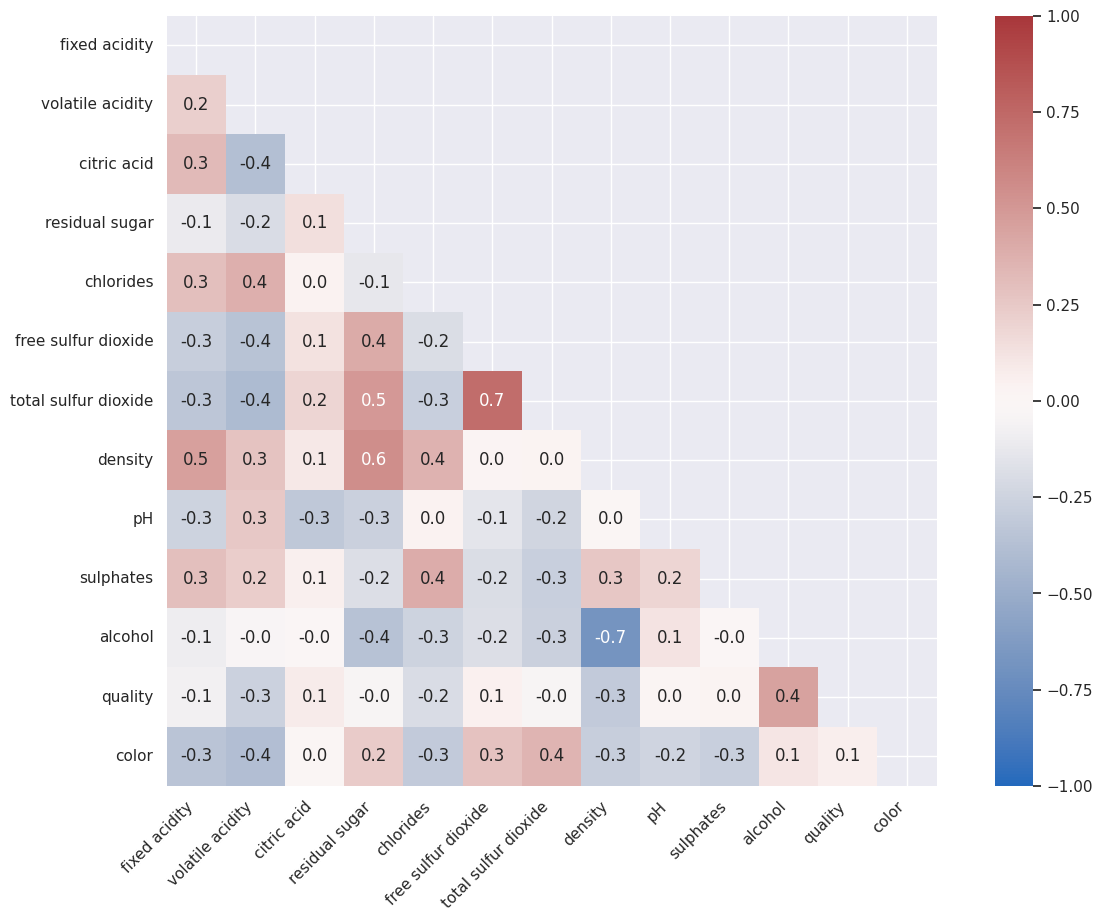

In [156]:


wines_mx=enc_wines_ml.corr()


# creating mask
mask = np.triu(np.ones_like(wines_mx))


ax=sns.heatmap(
    wines_mx,
    annot=True,fmt=".1f",
    square=True,
    mask=mask,
    cmap='vlag',
    vmin = -1,
    vmax = 1
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

## Drop what not important

In [157]:
enc_wines_ml=enc_wines_ml.drop(columns=['citric acid', 'alcohol', 'quality', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates'])

## Split data

- X = df # --> the features we will keep to build our model
- y = target # --> what you're trying to predict
- test-size: prportion of dataset to use for test
- random_state: shuffling applied to the data before applying the split

In [158]:
enc_wines_ml.head()

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,color
0,7.4,0.70,0.076,34.0,0
1,7.8,0.88,0.098,67.0,0
2,7.8,0.76,0.092,54.0,0
3,11.2,0.28,0.075,60.0,0
4,7.4,0.70,0.076,34.0,0


In [159]:
from sklearn.model_selection import train_test_split

X=enc_wines_ml.copy()


# Example:
y=enc_wines_ml[['color']]
X.drop(['color'],axis=1,inplace=True)


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) #,stratify=y

						    						    


In [160]:
#to know the shape of the train and test dataset.
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (5184, 4)
y_train (5184, 1)
X_test (1297, 4)
y_test (1297, 1)


# Hypetrparameter Tunig

## Feature scaling

- Use normalisation techniques when you know that the distribution of your data is skewed.
- On the other hand, standardisation can be helpful in cases where the data follows a Gaussian distribution (normal distribution). Also, outliers will not be affected by standardisation.

### Normalisation

In [161]:

# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)







## Model Accuracy compare

In [162]:

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def accuracy_compare(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train_norm, y_train.values.ravel())
    pred_lr = lr.predict(X_test_norm)
    print("\033[96m Logistic Regression: \033[0m", np.round(accuracy_score(y_test, pred_lr)*100, 2), '%')
 
    tree= DecisionTreeClassifier(max_depth=1, random_state=42)
    tree=tree.fit(X_train, y_train)
    pred_tree = tree.predict(X_test) 
    print("\033[96m Decision Tree Classifier: \033[0m", np.round(accuracy_score(y_test, pred_tree)*100, 2), '%')
    cla = AdaBoostClassifier(estimator=tree, n_estimators=100, random_state=42, learning_rate=0.5)
    cla.fit(X_train, y_train.values.ravel())
    pred_ada = cla.predict(X_test)
    print("\033[96m AdaBoost Classifier: \033[0m", np.round(accuracy_score(y_test, pred_ada)*100, 2), '%')
    clf = SVC(kernel = 'linear').fit(X_train,y_train.values.ravel())
    clf.predict(X_train)
    pred_svc = clf.predict(X_test)
    print("\033[96m Support Vector classifier: \033[0m", np.round(accuracy_score(y_test, pred_svc)*100, 2), '%')

accuracy_compare(X_train, X_test, y_train, y_test)

    

 Logistic Regression:  72.09 %
 Decision Tree Classifier:  69.08 %


 AdaBoost Classifier:  73.4 %
 Support Vector classifier:  74.4 %


## Evaluate models (detailed)

class color:
   - PURPLE = '\033[95m'
   - CYAN = '\033[96m'
   - DARKCYAN = '\033[36m'
   - BLUE = '\033[94m'
   - GREEN = '\033[92m'
   -  YELLOW = '\033[93m'
   - RED = '\033[91m'
   - BOLD = '\033[1m'
   - UNDERLINE = '\033[4m'
   - END = '\033[0m'

print(color.BOLD + 'Hello, World!' + color.END)

In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

def evaluate (y_test, pred_lr, target_names):
    print(" \033[95m \033[1m Confusion matrix: \033[0m")
    cm=confusion_matrix(y_test, pred_lr)
    print(cm, '\n\n')
    print("\033[95m \033[1m Accuracy score: \033[0m", np.round(accuracy_score(y_test, pred_lr)*100, 2), '%\n\n')
    print("\033[95m \033[1m Classification report: \033[0m \n",classification_report(y_test, pred_lr, target_names=target_names), '\n\n')
    kappa = cohen_kappa_score(pred_lr, y_test)
    print("\033[95m \033[1m Cohen-Kappa score: \033[0m", kappa)
    

## Logistic regression



Fitting the model means training the model on training data using the .fit method provided in sklearn.

In [164]:
from sklearn.linear_model import LogisticRegression


# Fit the model
lr = LogisticRegression()
lr.fit(X_train_norm, y_train)

pred_lr = lr.predict(X_test_norm)
pred_lr

evaluate(y_test, pred_lr,["red","white"])


   Confusion matrix: 
[[393 262]
 [100 542]] 


  Accuracy score:  72.09 %


  Classification report:  
               precision    recall  f1-score   support

         red       0.80      0.60      0.68       655
       white       0.67      0.84      0.75       642

    accuracy                           0.72      1297
   macro avg       0.74      0.72      0.72      1297
weighted avg       0.74      0.72      0.72      1297
 


  Cohen-Kappa score:  0.443127124534174


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## SVC (Support Vector classifier)

In [165]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC

#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train.values.ravel())
clf.predict(X_train)

#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [ ]:
evaluate(y_test, y_pred,["red","white"])

   Confusion matrix: 
[[347 304]
 [ 29 620]] 


  Accuracy score:  74.38 %


  Classification report:  
               precision    recall  f1-score   support

         red       0.92      0.53      0.68       651
       white       0.67      0.96      0.79       649

    accuracy                           0.74      1300
   macro avg       0.80      0.74      0.73      1300
weighted avg       0.80      0.74      0.73      1300
 


  Cohen-Kappa score:  0.4880243345144214


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(max_depth=1, random_state=42)

tree=tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

#evaluate(y_train, y_pred_train,["red","white"])
evaluate(y_test, y_pred_test,["red","white"])

   Confusion matrix: 
[[266 385]
 [ 16 633]] 


  Accuracy score:  69.15 %


  Classification report:  
               precision    recall  f1-score   support

         red       0.94      0.41      0.57       651
       white       0.62      0.98      0.76       649

    accuracy                           0.69      1300
   macro avg       0.78      0.69      0.66      1300
weighted avg       0.78      0.69      0.66      1300
 


  Cohen-Kappa score:  0.38361379910515814


## AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier



clf = AdaBoostClassifier(estimator=tree, n_estimators=100, random_state=42, learning_rate=0.5)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

evaluate(y_test, y_pred,["red","white"])

   Confusion matrix: 
[[374 277]
 [ 41 608]] 


  Accuracy score:  75.54 %


  Classification report:  
               precision    recall  f1-score   support

         red       0.90      0.57      0.70       651
       white       0.69      0.94      0.79       649

    accuracy                           0.76      1300
   macro avg       0.79      0.76      0.75      1300
weighted avg       0.79      0.76      0.75      1300
 


  Cohen-Kappa score:  0.5110411960211481
